In [1]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
df = pd.read_excel('C:\\Users\\17376\\Desktop\\CYX\\study\\5291_capstone\\project\\data\\core_dataset.xlsx')
df.head(5)

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N,HasSafetyRec,...,Scheduled,PurposeOfFlight,FAR,AirCraftDamage,WeatherCondition,Operator,ReportStatus,RepGenFlag,DocketUrl,DocketPublishDate
0,CEN25LA162,ACC,200057,2025-04-22T13:25:00Z,Fayetteville,Arkansas,United States,NaN,N4795C,False,...,NaN,NaN,NaN,NaN,NaN,NaN,In work,False,NaN,NaT
1,ENG25WA030,INC,200056,2025-04-22T04:00:00Z,Budapest,NaN,Hungary,NaN,SP-RZUb,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaT
2,DCA25LA190,ACC,200055,2025-04-20T04:00:00Z,Tulsa,Oklahoma,United States,NaN,N461WN,False,...,SCHD,NaN,121,NaN,NaN,SOUTHWEST AIRLINES CO,In work,False,NaN,NaT
3,WPR25LA138,ACC,200048,2025-04-19T11:42:00Z,Hood River,Oregon,United States,NaN,N5786S,False,...,NaN,INST,91,Substantial,VMC,HOOD RIVER SOARING INC,In work,False,NaN,NaT
4,WPR25LA136,ACC,200044,2025-04-19T11:06:00Z,Phoenix,Arizona,United States,NaN,N321WC,False,...,NaN,NaN,NaN,NaN,NaN,NaN,In work,False,NaN,NaT


In [5]:
Boeing= pd.read_csv('C:\\Users\\17376\\Desktop\\CYX\\study\\5291_capstone\\project\\data\\Boeing_Weekly_Prices.csv')
Boeing.head(5)

,Date,Close,High,Low,Open,Volume
0,2000/1/1,28.602894,28.965977,25.657885,26.747135,24792500
1,2000/1/8,28.401175,28.723915,27.110212,28.602887,14051300
2,2000/1/15,29.490435,31.063796,27.836388,28.401185,30657000
3,2000/1/22,28.804609,30.256943,28.159128,29.490433,17080700
4,2000/1/29,28.401175,29.167684,27.473295,28.764258,14199400


In [7]:
columns_to_keep = [
    'EventType', 'EventDate', 'City', 'State', 'Country', 'HighestInjuryLevel',
    'FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount',
    'Latitude', 'Longitude', 'Make', 'Model', 'AirportID',
    'Scheduled', 'PurposeOfFlight', 'FAR', 'AirCraftDamage', 'WeatherCondition'
]
df_cleaned = df[columns_to_keep]
print(df_cleaned.head())

  EventType             EventDate          City     State        Country  \
0       ACC  2025-04-22T13:25:00Z  Fayetteville  Arkansas  United States   
1       INC  2025-04-22T04:00:00Z      Budapest       NaN        Hungary   
2       ACC  2025-04-20T04:00:00Z         Tulsa  Oklahoma  United States   
3       ACC  2025-04-19T11:42:00Z    Hood River    Oregon  United States   
4       ACC  2025-04-19T11:06:00Z       Phoenix   Arizona  United States   

  HighestInjuryLevel  FatalInjuryCount  SeriousInjuryCount  MinorInjuryCount  \
0                NaN                 0                   0                 0   
1                NaN                 0                   0                 0   
2                NaN                 0                   0                 0   
3                NaN                 0                   0                 0   
4                NaN                 0                   0                 0   

    Latitude  Longitude                   Make              Mo

In [9]:
df_cleaned.columns.tolist()

['EventType',
 'EventDate',
 'City',
 'State',
 'Country',
 'HighestInjuryLevel',
 'FatalInjuryCount',
 'SeriousInjuryCount',
 'MinorInjuryCount',
 'Latitude',
 'Longitude',
 'Make',
 'Model',
 'AirportID',
 'Scheduled',
 'PurposeOfFlight',
 'FAR',
 'AirCraftDamage',
 'WeatherCondition']

In [11]:
missing_count = df_cleaned.isnull().sum()
missing_ratio = df_cleaned.isnull().mean()
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Ratio (%)': (missing_ratio * 100).round(2)
})
print(missing_df)

                    Missing Count  Missing Ratio (%)
EventType                       0               0.00
EventDate                       0               0.00
City                           13               0.05
State                        4908              19.50
Country                         4               0.02
HighestInjuryLevel          13877              55.14
FatalInjuryCount                0               0.00
SeriousInjuryCount              0               0.00
MinorInjuryCount                0               0.00
Latitude                        0               0.00
Longitude                       0               0.00
Make                           27               0.11
Model                          35               0.14
AirportID                    9970              39.61
Scheduled                   22224              88.30
PurposeOfFlight              4979              19.78
FAR                           683               2.71
AirCraftDamage               1619             

In [13]:
df_cleaned2 = df_cleaned.dropna(subset=['Make', 'Model'])
print(f"原始行数：{len(df_cleaned)}，去除后行数：{len(df_cleaned2)}")
removed_rows = len(df_cleaned) - len(df_cleaned2)
print(f"删除的行数：{removed_rows}，占比：{removed_rows / len(df_cleaned) * 100:.2f}%")

原始行数：25168，去除后行数：25130
删除的行数：38，占比：0.15%


In [15]:
missing_count = df_cleaned2.isnull().sum()
missing_ratio = df_cleaned2.isnull().mean()
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Ratio (%)': (missing_ratio * 100).round(2)
})
print(missing_df)

                    Missing Count  Missing Ratio (%)
EventType                       0               0.00
EventDate                       0               0.00
City                           13               0.05
State                        4876              19.40
Country                         4               0.02
HighestInjuryLevel          13855              55.13
FatalInjuryCount                0               0.00
SeriousInjuryCount              0               0.00
MinorInjuryCount                0               0.00
Latitude                        0               0.00
Longitude                       0               0.00
Make                            0               0.00
Model                           0               0.00
AirportID                    9937              39.54
Scheduled                   22208              88.37
PurposeOfFlight              4951              19.70
FAR                           680               2.71
AirCraftDamage               1609             

In [17]:
zero_location = df_cleaned2[(df_cleaned2['Latitude'] == 0) & (df_cleaned2['Longitude'] == 0)]
zero_location = zero_location[['Latitude', 'Longitude', 'City', 'State', 'Country']]
print(zero_location)

       Latitude  Longitude           City     State        Country
0           0.0        0.0   Fayetteville  Arkansas  United States
1           0.0        0.0       Budapest       NaN        Hungary
2           0.0        0.0          Tulsa  Oklahoma  United States
4           0.0        0.0        Phoenix   Arizona  United States
5           0.0        0.0         Trilla  Illinois  United States
...         ...        ...            ...       ...            ...
25133       0.0        0.0      St. Croix       NaN  United States
25157       0.0        0.0           Hahn       NaN        Germany
25159       0.0        0.0  Turin Airport       NaN          Italy
25161       0.0        0.0       Dortmund       NaN        Germany
25163       0.0        0.0      Sept-Îles       NaN         Canada

[2845 rows x 5 columns]


In [19]:
zero_location_nan_city = zero_location[zero_location['City'].isnull()]
print(zero_location_nan_city)


       Latitude  Longitude City State  Country
18765       0.0        0.0  NaN   NaN    China
22135       0.0        0.0  NaN   NaN   Brazil
24870       0.0        0.0  NaN   NaN  Hungary


In [21]:
city_mapping = df_cleaned2[
    (df_cleaned2['Latitude'] != 0) & (df_cleaned2['Longitude'] != 0)
][['City', 'State', 'Country', 'Latitude', 'Longitude']].dropna().drop_duplicates()
state_mapping = df_cleaned2[
    (df_cleaned2['Latitude'] != 0) & (df_cleaned2['Longitude'] != 0)
][['State', 'Country', 'Latitude', 'Longitude']].dropna().drop_duplicates()
country_mapping = df_cleaned2[
    (df_cleaned2['Latitude'] != 0) & (df_cleaned2['Longitude'] != 0)
][['Country', 'Latitude', 'Longitude']].dropna().drop_duplicates()
def fill_lat_lon(row):
    if row['Latitude'] == 0 and row['Longitude'] == 0:
        # 优先 City + State + Country
        match = city_mapping[
            (city_mapping['City'] == row['City']) & 
            (city_mapping['State'] == row['State']) & 
            (city_mapping['Country'] == row['Country'])
        ]
        if not match.empty:
            row['Latitude'] = match['Latitude'].values[0]
            row['Longitude'] = match['Longitude'].values[0]
            return row
        match = state_mapping[
            (state_mapping['State'] == row['State']) & 
            (state_mapping['Country'] == row['Country'])
        ]
        if not match.empty:
            row['Latitude'] = match['Latitude'].values[0]
            row['Longitude'] = match['Longitude'].values[0]
            return row
        match = country_mapping[
            (country_mapping['Country'] == row['Country'])
        ]
        if not match.empty:
            row['Latitude'] = match['Latitude'].values[0]
            row['Longitude'] = match['Longitude'].values[0]
            return row

    return row
df_cleaned3 = df_cleaned2.apply(fill_lat_lon, axis=1)
print(f"补齐后的 Latitude=0 和 Longitude=0 的行数：{len(df_cleaned3[(df_cleaned3['Latitude'] == 0) & (df_cleaned3['Longitude'] == 0)])}")

补齐后的 Latitude=0 和 Longitude=0 的行数：33


In [23]:
still_missing = df_cleaned3[(df_cleaned3['Latitude'] == 0) & (df_cleaned3['Longitude'] == 0)]
still_missing = still_missing[['City', 'Country']]
print(still_missing)

                             City                                Country
859                        Malabo                      Equatorial Guinea
1180                  Ho Chi Minh                                Vietnam
1299                       Muscat                                   Oman
1481                    Samarkand                             Uzbekistan
1925                      Tripoli                                  Libya
1966                       Muscat                                   Oman
1994                       Bequia          St Vincent And The Grenadines
2931                   Donam Port  Democratic People's Republic Of Korea
3157                   Luxembourg                             Luxembourg
3779              Jraber township                                Armenia
4559                          TBD                                   Oman
4727                     Punaauia                       French Polynesia
6088                      Paranam                  

In [25]:
import pandas as pd
data = {
    'City': [
        'Malabo', 'Ho Chi Minh', 'Muscat', 'Samarkand', 'Tripoli', 'Bequia',
        'Luxembourg', 'Punaauia', 'Paranam', 'TAN SON NHAT INT’L AIRPORT', 'Incheon',
        'Lifou Wanaham', 'Albania', 'Conakry', 'Poesoegroenoe', 'Ulaanbaatar',
        'Nicosia', 'Nauru', 'Noumea, New Caledonia', 'Honiara',
        'CAM RANH, Vietnam', 'Arnos Vale', 'Muharraq'
    ],
    'Country': [
        'Equatorial Guinea', 'Vietnam', 'Oman', 'Uzbekistan', 'Libya',
        'St Vincent And The Grenadines', 'Luxembourg', 'French Polynesia',
        'Suriname', 'Vietnam', 'South Korea', 'New Caledonia', 'Albania',
        'Guinea', 'Suriname', 'Mongolia', 'Cyprus', 'Nauru', 'New Caledonia',
        'Solomon Islands', 'Vietnam', 'St Vincent And The Grenadines', 'Bahrain'
    ],
    'Latitude': [
        3.75, 10.7769, 23.6139, 39.6542, 32.8872, 13.0116,
        49.6117, -17.6333, 5.7167, 10.8188, 37.4563,
        -20.9, 41.3275, 9.5092, 4.35, 47.9186,
        35.1667, -0.5277, -22.2758, -9.4319,
        11.9981, 13.1444, 26.2572
    ],
    'Longitude': [
        8.7833, 106.7009, 58.5922, 66.9597, 13.1913, -61.2358,
        6.13, -149.5667, -55.0667, 106.6518, 126.7052,
        167.2833, 19.8189, -13.7122, -55.4333, 106.917,
        33.3667, 166.9364, 166.458, 159.9569,
        109.2249, -61.2108, 50.6119
    ]
}
geo_df = pd.DataFrame(data)

In [27]:
df_merged = df_cleaned3.merge(
    geo_df[['City', 'Latitude', 'Longitude']],
    on='City',
    how='left',
    suffixes=('', '_geo')
)

df_merged['Latitude'] = df_merged.apply(
    lambda row: row['Latitude_geo'] if row['Latitude'] == 0 and pd.notna(row['Latitude_geo']) else row['Latitude'],
    axis=1
)
df_merged['Longitude'] = df_merged.apply(
    lambda row: row['Longitude_geo'] if row['Longitude'] == 0 and pd.notna(row['Longitude_geo']) else row['Longitude'],
    axis=1
)

df_cleaned3 = df_merged.drop(columns=['Latitude_geo', 'Longitude_geo'])
missing_after = df_cleaned3[(df_cleaned3['Latitude'] == 0) & (df_cleaned3['Longitude'] == 0)]
print(f"更新后 Latitude=0 且 Longitude=0 的行数：{len(missing_after)}")

更新后 Latitude=0 且 Longitude=0 的行数：5


In [29]:
df_cleaned3 = df_cleaned3[~((df_cleaned3['Latitude'] == 0) & (df_cleaned3['Longitude'] == 0))]
remaining = df_cleaned3[(df_cleaned3['Latitude'] == 0) & (df_cleaned3['Longitude'] == 0)]
print(f"删除后 Latitude=0 且 Longitude=0 的行数：{len(remaining)}")

删除后 Latitude=0 且 Longitude=0 的行数：0


In [31]:
missing_count = df_cleaned3.isnull().sum()
missing_ratio = df_cleaned3.isnull().mean()
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Ratio (%)': (missing_ratio * 100).round(2)
})
print(missing_df)

                    Missing Count  Missing Ratio (%)
EventType                       0               0.00
EventDate                       0               0.00
City                           13               0.05
State                        4871              19.39
Country                         4               0.02
HighestInjuryLevel          13852              55.13
FatalInjuryCount                0               0.00
SeriousInjuryCount              0               0.00
MinorInjuryCount                0               0.00
Latitude                        0               0.00
Longitude                       0               0.00
Make                            0               0.00
Model                           0               0.00
AirportID                    9932              39.53
Scheduled                   22203              88.37
PurposeOfFlight              4947              19.69
FAR                           680               2.71
AirCraftDamage               1609             

In [33]:
df_cleaned4 = df_cleaned3.copy()
df_cleaned4[['City', 'State', 'Country', 'HighestInjuryLevel']] = df_cleaned4[[
    'City', 'State', 'Country', 'HighestInjuryLevel'
]].fillna('NaN')
print(df_cleaned4[['City', 'State', 'Country', 'HighestInjuryLevel']].isnull().sum())

City                  0
State                 0
Country               0
HighestInjuryLevel    0
dtype: int64


In [35]:
missing_count = df_cleaned4.isnull().sum()
missing_ratio = df_cleaned4.isnull().mean()
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Ratio (%)': (missing_ratio * 100).round(2)
})
print(missing_df)

                    Missing Count  Missing Ratio (%)
EventType                       0               0.00
EventDate                       0               0.00
City                            0               0.00
State                           0               0.00
Country                         0               0.00
HighestInjuryLevel              0               0.00
FatalInjuryCount                0               0.00
SeriousInjuryCount              0               0.00
MinorInjuryCount                0               0.00
Latitude                        0               0.00
Longitude                       0               0.00
Make                            0               0.00
Model                           0               0.00
AirportID                    9932              39.53
Scheduled                   22203              88.37
PurposeOfFlight              4947              19.69
FAR                           680               2.71
AirCraftDamage               1609             

In [37]:
cols_to_check = ['AirportID', 'Scheduled', 'PurposeOfFlight', 'FAR', 'AirCraftDamage', 'WeatherCondition']

for col in cols_to_check:
    non_missing = df_cleaned4[col].dropna()
    unique_values = non_missing.unique()
    num_unique = len(unique_values)

    print(f"列：{col}")
    print(f"非缺失的类别数量：{num_unique}")
    print(f"类别值：{unique_values}")
    print("-" * 40)


列：AirportID
非缺失的类别数量：5758
类别值：['4S2' 'PVF' '01CL' ... 'KOLD' 'PTRO' 'YZV']
----------------------------------------
列：Scheduled
非缺失的类别数量：2
类别值：['SCHD' 'NSCH']
----------------------------------------
列：PurposeOfFlight
非缺失的类别数量：82
类别值：['INST' 'PERS' 'AAPL' 'BUS' 'AOBV' 'OWRK' 'FLTS' 'UNK' 'FIRF' 'POSI' ','
 ',PERS' 'FERY' 'PERS,INST' 'ASHO' 'EXEC' 'PERS,PERS' 'ADRP' 'FIRF,UNK'
 'PUBS' 'PUBF' 'INST,INST' 'AOBV,PERS' 'EXLD' 'PUBU' 'SKYD' 'PERS,EXEC'
 'FLTS,FLTS' ',,' 'ASHO,ASHO' 'PUBL' 'AAPL,AAPL' 'BANT' 'AAPL,' 'GLDT'
 ',UNK' 'INST,OWRK' 'AAPL,FIRF' 'OWRK,OWRK' 'AAPL,PERS' 'PERS,' 'POSI,BUS'
 ',EXEC' 'PUBS,PUBS' 'POSI,' 'INST,PERS' 'INST,PUBF' 'BUS,BUS' 'INST,EXEC'
 'PERS,UNK' ',INST' 'POSI,PERS' 'PERS,BUS' 'FIRF,FIRF' 'PERS,AOBV'
 'AOBV,AOBV' 'AOBV,' 'PERS,SKYD' 'ADRP,' 'BUS,' 'PUBU,' 'BUS,INST' ',OWRK'
 'POSI,POSI' 'PERS,OWRK' 'UNK,UNK' 'PUBS,PERS' 'FLTS,' 'GLDT,GLDT'
 'SKYD,SKYD' 'OWRK,PERS' 'PUBL,PUBL' 'UNK,' 'PUBU,INST' 'FERY,PERS'
 'PERS,POSI' ',UNK,' ',POSI' 'GLDT,PERS' ',AOBV' ',

In [39]:
summary = []

for col in cols_to_check:
    non_missing = df_cleaned4[col].dropna()
    unique_values = non_missing.unique()
    summary.append({
        'Column': col,
        'Non-missing Category Count': len(unique_values),
        'Categories': list(unique_values)
    })

summary_df = pd.DataFrame(summary)
print(summary_df)


             Column  Non-missing Category Count  \
0         AirportID                        5758   
1         Scheduled                           2   
2   PurposeOfFlight                          82   
3               FAR                          65   
4    AirCraftDamage                          24   
5  WeatherCondition                           3   

                                          Categories  
0  [4S2, PVF, 01CL, AQY, OAK, DUG, PVB, AUW, FBY,...  
1                                       [SCHD, NSCH]  
2  [INST, PERS, AAPL, BUS, AOBV, OWRK, FLTS, UNK,...  
3  [121, 91, 137, 135, 129, NUSN, NUSC, ,, 121121...  
4  [Substantial, Destroyed, Minor, ,, None,None, ...  
5                                [VMC, IMC, Unknown]  


In [41]:
def clean_multicategory_column(series):
    cleaned_values = []

    for value in series:
        if pd.isnull(value):
            cleaned_values.append(['UNK'])
            continue
        parts = str(value).replace(' ', '').split(',')
        parts = [p for p in parts if p != '' and p != 'UNK']

        if not parts:
            parts = ['UNK']

        cleaned_values.append(parts)

    return cleaned_values
df_cleaned5 = df_cleaned4.copy()
df_cleaned5['PurposeOfFlight_clean'] = clean_multicategory_column(df_cleaned5['PurposeOfFlight'])
df_cleaned5['FAR_clean'] = clean_multicategory_column(df_cleaned5['FAR'])

In [43]:
# PurposeOfFlight
purpose_categories = set()
for lst in df_cleaned5['PurposeOfFlight_clean']:
    purpose_categories.update(lst)

print("PurposeOfFlight 清洗后的所有类别：")
print(sorted(purpose_categories))
print("-" * 50)

# FAR
far_categories = set()
for lst in df_cleaned5['FAR_clean']:
    far_categories.update(lst)

print("FAR 清洗后的所有类别：")
print(sorted(far_categories))

PurposeOfFlight 清洗后的所有类别：
['AAPL', 'ADRP', 'AOBV', 'ASHO', 'BANT', 'BUS', 'EXEC', 'EXLD', 'FERY', 'FIRF', 'FLTS', 'GLDT', 'INST', 'OWRK', 'PERS', 'POSI', 'PUBF', 'PUBL', 'PUBS', 'PUBU', 'SKYD', 'UNK']
--------------------------------------------------
FAR 清洗后的所有类别：
['091', '091K', '103', '107', '121', '121091', '121121', '121129', '121135', '125', '129', '129091', '129121', '129129', '129135', '133', '135', '135091', '135103', '135107', '135121', '135135', '137', '137137', '437', '91', '91091', '91091091', '91107', '91121', '91135', 'ARMF', 'NUSC', 'NUSN', 'PUBU', 'UNK']


In [45]:
def simplify_far_code(code):
    # 如果是缺失或未知
    if pd.isnull(code) or code == 'UNK':
        return 'UNK'
    
    # FAR 的主要类别
    if '121' in code:
        return '121'
    elif '91' in code:
        return '91'
    elif '135' in code:
        return '135'
    elif '129' in code:
        return '129'
    elif '133' in code:
        return '133'
    elif '125' in code:
        return '125'
    elif '103' in code:
        return '103'
    elif '107' in code:
        return '107'
    elif 'NUSN' in code or 'NUSC' in code:
        return 'NUS'
    elif 'ARMF' in code:
        return 'ARMF'
    elif 'PUBU' in code:
        return 'PUBU'
    else:
        return code  # 其他保留原值
df_cleaned5['FAR_simplified'] = df_cleaned5['FAR_clean'].apply(lambda lst: simplify_far_code(lst[0]))


In [47]:
print("简化后的 FAR 类别：")
print(sorted(df_cleaned5['FAR_simplified'].unique()))

简化后的 FAR 类别：
['103', '107', '121', '125', '129', '133', '135', '137', '137137', '437', '91', 'ARMF', 'NUS', 'PUBU', 'UNK']


In [49]:
df_cleaned5 = df_cleaned5.copy()
print("确认包含的清洗列：")
print(['PurposeOfFlight_clean', 'FAR_clean', 'FAR_simplified' in df_cleaned5.columns])

确认包含的清洗列：
['PurposeOfFlight_clean', 'FAR_clean', True]


In [51]:
missing_count = df_cleaned5.isnull().sum()
missing_ratio = df_cleaned5.isnull().mean()
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Ratio (%)': (missing_ratio * 100).round(2)
})
print(missing_df)

                       Missing Count  Missing Ratio (%)
EventType                          0               0.00
EventDate                          0               0.00
City                               0               0.00
State                              0               0.00
Country                            0               0.00
HighestInjuryLevel                 0               0.00
FatalInjuryCount                   0               0.00
SeriousInjuryCount                 0               0.00
MinorInjuryCount                   0               0.00
Latitude                           0               0.00
Longitude                          0               0.00
Make                               0               0.00
Model                              0               0.00
AirportID                       9932              39.53
Scheduled                      22203              88.37
PurposeOfFlight                 4947              19.69
FAR                              680            

In [53]:
compare_df = df_cleaned5[['PurposeOfFlight', 'PurposeOfFlight_clean', 'FAR', 'FAR_clean', 'FAR_simplified']]
print(compare_df.head(10))

  PurposeOfFlight PurposeOfFlight_clean  FAR FAR_clean FAR_simplified
0             NaN                 [UNK]  NaN     [UNK]            UNK
1             NaN                 [UNK]  NaN     [UNK]            UNK
2             NaN                 [UNK]  121     [121]            121
3            INST                [INST]   91      [91]             91
4             NaN                 [UNK]  NaN     [UNK]            UNK
5             NaN                 [UNK]   91      [91]             91
6            PERS                [PERS]   91      [91]             91
7            PERS                [PERS]   91      [91]             91
8            AAPL                [AAPL]  137     [137]            137
9            INST                [INST]  NaN     [UNK]            UNK


In [55]:
df_cleaned5 = df_cleaned5.drop(columns=['PurposeOfFlight', 'FAR', 'FAR_clean'])
print("现在的列名：")
print(df_cleaned5.columns.tolist())

现在的列名：
['EventType', 'EventDate', 'City', 'State', 'Country', 'HighestInjuryLevel', 'FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount', 'Latitude', 'Longitude', 'Make', 'Model', 'AirportID', 'Scheduled', 'AirCraftDamage', 'WeatherCondition', 'PurposeOfFlight_clean', 'FAR_simplified']


In [57]:
df_cleaned5 = df_cleaned5.rename(columns={
    'PurposeOfFlight_clean': 'PurposeOfFlight',
    'FAR_simplified': 'FAR'
})
print("现在的列名：")
print(df_cleaned5.columns.tolist())


现在的列名：
['EventType', 'EventDate', 'City', 'State', 'Country', 'HighestInjuryLevel', 'FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount', 'Latitude', 'Longitude', 'Make', 'Model', 'AirportID', 'Scheduled', 'AirCraftDamage', 'WeatherCondition', 'PurposeOfFlight', 'FAR']


In [59]:
multi_label_rows = df_cleaned5[df_cleaned5['PurposeOfFlight'].str.count(',') >= 1]
print(f"包含多个类别的行数：{len(multi_label_rows)}")
print(multi_label_rows[['PurposeOfFlight']].head(10))


包含多个类别的行数：0
Empty DataFrame
Columns: [PurposeOfFlight]
Index: []


In [61]:
df_cleaned5['PurposeOfFlight'] = df_cleaned5['PurposeOfFlight'].apply(lambda x: x[0] if isinstance(x, list) else x)
df_cleaned5['FAR'] = df_cleaned5['FAR'].apply(lambda x: x[0] if isinstance(x, list) else x)
df_cleaned5

,EventType,EventDate,City,State,Country,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,Latitude,Longitude,Make,Model,AirportID,Scheduled,AirCraftDamage,WeatherCondition,PurposeOfFlight,FAR
0,ACC,2025-04-22T13:25:00Z,Fayetteville,Arkansas,United States,NaN,0,0,0,36.005083,-9.417006e+01,CESSNA,T210N,NaN,NaN,NaN,NaN,UNK,UNK
1,INC,2025-04-22T04:00:00Z,Budapest,NaN,Hungary,NaN,0,0,0,47.467000,1.895000e+01,BOEING,737,NaN,NaN,NaN,NaN,UNK,UNK
2,ACC,2025-04-20T04:00:00Z,Tulsa,Oklahoma,United States,NaN,0,0,0,36.198393,-9.588810e+01,BOEING,737-7H4,NaN,SCHD,NaN,NaN,UNK,121
3,ACC,2025-04-19T11:42:00Z,Hood River,Oregon,United States,NaN,0,0,0,45.674118,-1.215227e+02,SCHWEIZER,SGS 2-33A,4S2,NaN,Substantial,VMC,INST,91
4,ACC,2025-04-19T11:06:00Z,Phoenix,Arizona,United States,NaN,0,0,0,33.688306,-1.120825e+02,CHAPIN WALLACE HADLEY,SENIOR AERO SPORT,NaN,NaN,NaN,NaN,UNK,UNK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25125,ACC,2010-01-02T17:21:00Z,Somerset,Kentucky,United States,NaN,0,0,0,37.053611,-8.461555e+01,FAIRCHILD,SA227,SME,NSCH,Substantial,VMC,UNK,135
25126,INC,2010-01-02T14:36:00Z,Sept-Îles,NaN,Canada,NaN,0,0,0,5350.000000,1.140549e+06,Hawker Beechcraft Corp.,200,YZV,NSCH,Minor,NaN,UNK,NUS
25127,ACC,2010-01-01T21:30:00Z,Pearsall,Texas,United States,NaN,0,0,0,28.864721,-9.912305e+01,MAULE,M-4-220C,NaN,NaN,Substantial,VMC,PERS,91
25128,ACC,2010-01-01T13:42:00Z,Tipton,California,United States,Minor,0,0,1,36.068889,-1.192611e+02,HILLER,UH-12E,VIS,NaN,Substantial,VMC,AAPL,137


In [63]:
missing_count = df_cleaned5.isnull().sum()
missing_ratio = df_cleaned5.isnull().mean()
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Ratio (%)': (missing_ratio * 100).round(2)
})
print(missing_df)

                    Missing Count  Missing Ratio (%)
EventType                       0               0.00
EventDate                       0               0.00
City                            0               0.00
State                           0               0.00
Country                         0               0.00
HighestInjuryLevel              0               0.00
FatalInjuryCount                0               0.00
SeriousInjuryCount              0               0.00
MinorInjuryCount                0               0.00
Latitude                        0               0.00
Longitude                       0               0.00
Make                            0               0.00
Model                           0               0.00
AirportID                    9932              39.53
Scheduled                   22203              88.37
AirCraftDamage               1609               6.40
WeatherCondition             4437              17.66
PurposeOfFlight                 0             

In [65]:
df_cleaned6 = df_cleaned5.copy()
df_cleaned6[['AirportID', 'Scheduled', 'AirCraftDamage', 'WeatherCondition']] = \
    df_cleaned6[['AirportID', 'Scheduled', 'AirCraftDamage', 'WeatherCondition']].fillna('UNK')
print(df_cleaned6[['AirportID', 'Scheduled', 'AirCraftDamage', 'WeatherCondition']].isnull().sum())


AirportID           0
Scheduled           0
AirCraftDamage      0
WeatherCondition    0
dtype: int64


In [95]:
import pandas as pd
df = pd.read_csv('C:\\Users\\17376\\Desktop\\CYX\\study\\5291_capstone\\project\\data_new\\df_with_score.csv')
print(df.head())

  EventType             EventDate          City     State        Country  \
0       ACC  2025-04-22T13:25:00Z  Fayetteville  Arkansas  United States   
1       INC  2025-04-22T04:00:00Z      Budapest       NaN        Hungary   
2       ACC  2025-04-20T04:00:00Z         Tulsa  Oklahoma  United States   
3       ACC  2025-04-19T11:42:00Z    Hood River    Oregon  United States   
4       ACC  2025-04-19T11:06:00Z       Phoenix   Arizona  United States   

  HighestInjuryLevel  FatalInjuryCount  SeriousInjuryCount  MinorInjuryCount  \
0               NONE                 0                   0                 0   
1               NONE                 0                   0                 0   
2               NONE                 0                   0                 0   
3               NONE                 0                   0                 0   
4               NONE                 0                   0                 0   

    Latitude   Longitude                   Make              M

In [97]:
boeing = pd.read_csv(
    'C:\\Users\\17376\\Desktop\\CYX\\study\\5291_capstone\\project\\data_new\\boeing_stock_2010_2025.csv',
    skiprows=2,
    names=['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
)
boeing = boeing.drop(index=0).reset_index(drop=True)
print(boeing.head())

         Date      Close       High        Low       Open      Volume
0  2010-01-04  43.777546  43.941185  42.702198  43.419098   6186700.0
1  2010-01-05  45.211349  45.413950  43.637290  43.832099   8867800.0
2  2010-01-06  46.582802  46.746444  45.102253  45.374985   8836500.0
3  2010-01-07  48.468555  48.554272  45.990581  46.372405  14379100.0
4  2010-01-08  48.001015  48.141278  47.424381  47.954262   7146600.0


In [99]:
airbus = pd.read_csv('C:\\Users\\17376\\Desktop\\CYX\\study\\5291_capstone\\project\\data_new\\AIR.PA.csv')
airbus = airbus.drop(columns=['Dividends', 'Stock Splits'])
print(airbus.head())

       Date    Open    High     Low   Close  Adj Close   Volume
0  2009/1/2  12.100  12.630  11.860  12.630   9.872783  1702735
1  2009/1/5  12.700  13.440  12.695  13.440  10.505952  2628493
2  2009/1/6  13.445  13.925  13.430  13.780  10.771729  2797192
3  2009/1/7  13.655  13.800  13.320  13.605  10.634932  2319050
4  2009/1/8  13.360  13.490  13.100  13.420  10.490321  2219720


In [101]:
sp500 = pd.read_csv('C:\\Users\\17376\\Desktop\\CYX\\study\\5291_capstone\\project\\data_new\\sp500.csv')
sp500 = sp500.drop(columns=['Dividends', 'Stock Splits'])
print(sp500.head())

       Date        Open        High         Low       Close   Adj Close  \
0  2009-1-2  902.989990  934.729980  899.349976  931.799988  931.799988   
1  2009-1-5  929.169983  936.630005  919.530029  927.450012  927.450012   
2  2009-1-6  931.169983  943.849976  927.280029  934.700012  934.700012   
3  2009-1-7  927.450012  927.450012  902.369995  906.650024  906.650024   
4  2009-1-8  905.729980  910.000000  896.809998  909.729980  909.729980   

       Volume  
0  4048270000  
1  5413910000  
2  5392620000  
3  4704940000  
4  4991550000  


In [91]:
import pandas as pd
df['EventDate'] = pd.to_datetime(df['EventDate']).dt.date
boeing['Date'] = pd.to_datetime(boeing['Date']).dt.date
airbus['Date'] = pd.to_datetime(airbus['Date']).dt.date
sp500['Date'] = pd.to_datetime(sp500['Date']).dt.date
boeing_price = boeing[['Date', 'Close']].rename(columns={'Close': 'boeing'})
airbus_price = airbus[['Date', 'Close']].rename(columns={'Close': 'airbus'})
sp500_price = sp500[['Date', 'Close']].rename(columns={'Close': 'sp500'})
df = df.rename(columns={'EventDate': 'Date'})
df2 = pd.merge(df, boeing_price, on='Date', how='left')
df2 = pd.merge(df2, airbus_price, on='Date', how='left')
df2 = pd.merge(df2, sp500_price, on='Date', how='left')
print(df2.head())

  EventType        Date          City     State        Country  \
0       ACC  2025-04-22  Fayetteville  Arkansas  United States   
1       INC  2025-04-22      Budapest       NaN        Hungary   
2       ACC  2025-04-20         Tulsa  Oklahoma  United States   
3       ACC  2025-04-19    Hood River    Oregon  United States   
4       ACC  2025-04-19       Phoenix   Arizona  United States   

  HighestInjuryLevel  FatalInjuryCount  SeriousInjuryCount  MinorInjuryCount  \
0               NONE                 0                   0                 0   
1               NONE                 0                   0                 0   
2               NONE                 0                   0                 0   
3               NONE                 0                   0                 0   
4               NONE                 0                   0                 0   

    Latitude  ...  AirportID Scheduled AirCraftDamage WeatherCondition  \
0  36.005083  ...        UNK       UNK          

In [77]:
df2_clean = df2.dropna(subset=['boeing', 'airbus', 'sp500']).reset_index(drop=True)
print(df2_clean.head())

  EventType        Date           City       State        Country  \
0       ACC  2024-12-31      Anchorage      Alaska  United States   
1       ACC  2024-12-31     Los Alamos  New Mexico  United States   
2       ACC  2024-12-31      Galveston       Texas  United States   
3       ACC  2024-12-30        Peebles        Ohio  United States   
4       ACC  2024-12-27  New Braunfels       Texas  United States   

  HighestInjuryLevel  FatalInjuryCount  SeriousInjuryCount  MinorInjuryCount  \
0               NONE                 0                   0                 0   
1               NONE                 0                   0                 0   
2               NONE                 0                   0                 0   
3              Fatal                 1                   0                 0   
4            Serious                 0                   2                 1   

    Latitude  ...  AirportID Scheduled AirCraftDamage WeatherCondition  \
0  61.215714  ...        AMR  

In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
df['EventDate'] = pd.to_datetime(df['EventDate']).dt.date
daily_severity = df.groupby('EventDate')['SeverityScore'].sum().reset_index()
airbus['Date'] = pd.to_datetime(airbus['Date']).dt.date
full_dates = pd.DataFrame({'Date': airbus['Date'].unique()})
daily_severity_full = full_dates.merge(daily_severity, how='left', left_on='Date', right_on='EventDate')
daily_severity_full['SeverityScore'] = daily_severity_full['SeverityScore'].fillna(0)
daily_severity_full = daily_severity_full.dropna(subset=daily_severity_full.columns.tolist()).reset_index(drop=True)
daily_severity_full['Date'] = pd.to_datetime(daily_severity_full['Date'])
airbus['Date'] = pd.to_datetime(airbus['Date'])
common_dates = pd.Series(list(set(daily_severity_full['Date']) & set(airbus['Date'])))
daily_severity_full_aligned = daily_severity_full[daily_severity_full['Date'].isin(common_dates)].reset_index(drop=True)
airbus_aligned = airbus[airbus['Date'].isin(common_dates)].reset_index(drop=True)
merged_data = pd.merge(daily_severity_full_aligned, airbus_aligned, on='Date', how='inner')
merged_data['Return'] = np.log(merged_data['Close']).diff()
merged_data = merged_data.dropna().reset_index(drop=True)
scaler = StandardScaler()
merged_data['SeverityScore_scaled'] = scaler.fit_transform(merged_data[['SeverityScore']])
print(merged_data.head())


        Date   EventDate  SeverityScore    Open    High     Low   Close  \
0 2010-01-05  2010-01-05           20.0  13.880  14.025  13.705  13.945   
1 2010-01-06  2010-01-06            3.0  13.960  14.090  13.925  14.070   
2 2010-01-07  2010-01-07            1.0  13.910  14.265  13.860  14.210   
3 2010-01-08  2010-01-08           12.0  14.315  14.480  14.205  14.350   
4 2010-01-11  2010-01-11            0.0  14.470  14.590  14.360  14.480   

   Adj Close   Volume    Return  SeverityScore_scaled  
0  11.085545  2700340 -0.003222              0.363594  
1  11.184914  3993940  0.008924             -0.228839  
2  11.296206  4633114  0.009901             -0.298538  
3  11.407497  2289556  0.009804              0.084802  
4  11.510842  2884240  0.009018             -0.333387  


In [105]:
sp500['Date'] = pd.to_datetime(sp500['Date'])  
merged_data = pd.merge(
    merged_data,
    sp500[['Date', 'Close']].rename(columns={'Close': 'SP500_Close'}),
    on='Date',
    how='left'
)
print(merged_data.head())

        Date   EventDate  SeverityScore    Open    High     Low   Close  \
0 2010-01-05  2010-01-05           20.0  13.880  14.025  13.705  13.945   
1 2010-01-06  2010-01-06            3.0  13.960  14.090  13.925  14.070   
2 2010-01-07  2010-01-07            1.0  13.910  14.265  13.860  14.210   
3 2010-01-08  2010-01-08           12.0  14.315  14.480  14.205  14.350   
4 2010-01-11  2010-01-11            0.0  14.470  14.590  14.360  14.480   

   Adj Close   Volume    Return  SeverityScore_scaled  SP500_Close  
0  11.085545  2700340 -0.003222              0.363594  1136.520020  
1  11.184914  3993940  0.008924             -0.228839  1137.140015  
2  11.296206  4633114  0.009901             -0.298538  1141.689941  
3  11.407497  2289556  0.009804              0.084802  1144.979980  
4  11.510842  2884240  0.009018             -0.333387  1146.979980  


In [107]:
merged_data = merged_data.drop(columns=['EventDate', 'Open', 'High', 'Low', 'Volume'])
print(merged_data.shape) 

(3814, 7)


In [109]:
merged_data['SP500_Return'] = np.log(merged_data['SP500_Close']).diff()
merged_data = merged_data.dropna().reset_index(drop=True)
final_data = merged_data[['Date', 'Return', 'SP500_Return', 'SeverityScore_scaled']]
print(final_data.head())

        Date    Return  SP500_Return  SeverityScore_scaled
0 2010-01-06  0.008924      0.000545             -0.228839
1 2010-01-07  0.009901      0.003993             -0.298538
2 2010-01-08  0.009804      0.002878              0.084802
3 2010-01-11  0.009018      0.001745             -0.333387
4 2010-01-12 -0.026594     -0.009425             -0.333387


In [111]:
import pandas as pd
df = pd.read_csv('C:\\Users\\17376\\Desktop\\CYX\\study\\5291_capstone\\project\\data_new\\merged_data.csv')
print(df.head())

         Date   EventDate  SeverityScore      Close       High        Low  \
0  2010-01-06  2010-01-06            3.0  46.582802  46.746444  45.102253   
1  2010-01-07  2010-01-07            1.0  48.468555  48.554272  45.990581   
2  2010-01-08  2010-01-08           12.0  48.001015  48.141278  47.424381   
3  2010-01-11  2010-01-11            0.0  47.432175  48.382845  47.151649   
4  2010-01-12  2010-01-12            0.0  47.089306  47.689319  46.684102   

        Open      Volume    Return  SeverityScore_scaled  
0  45.374985   8836500.0  0.029883             -0.226338  
1  46.372405  14379100.0  0.039684             -0.295539  
2  47.954262   7146600.0 -0.009693              0.085066  
3  48.273752   5624900.0 -0.011921             -0.330139  
4  46.808780   5273800.0 -0.007255             -0.330139  


In [113]:
df['Date'] = pd.to_datetime(df['Date'])
sp500['Date'] = pd.to_datetime(sp500['Date'])
df = pd.merge(
    df,
    sp500[['Date', 'Close']].rename(columns={'Close': 'SP500_Close'}),
    on='Date',
    how='left'
)
df['SP500_Return'] = np.log(df['SP500_Close']).diff()
df = df.drop(columns=['EventDate', 'Open', 'High', 'Low', 'Volume'])
df = df.dropna().reset_index(drop=True)
final_data_boeing = df[['Date', 'Return', 'SP500_Return', 'SeverityScore_scaled']]
print(final_data_boeing.head())

        Date    Return  SP500_Return  SeverityScore_scaled
0 2010-01-07  0.039684      0.003993             -0.295539
1 2010-01-08 -0.009693      0.002878              0.085066
2 2010-01-11 -0.011921      0.001745             -0.330139
3 2010-01-12 -0.007255     -0.009425             -0.330139
4 2010-01-13  0.012008      0.008291             -0.226338


In [115]:
import pandas as pd
df = pd.read_csv('C:\\Users\\17376\\Desktop\\CYX\\study\\5291_capstone\\project\\data_new\\df_cleaned2.csv')
print(df.head())

  EventType             EventDate          City     State        Country  \
0       ACC  2025-04-22T13:25:00Z  Fayetteville  Arkansas  United States   
1       INC  2025-04-22T04:00:00Z      Budapest       NaN        Hungary   
2       ACC  2025-04-20T04:00:00Z         Tulsa  Oklahoma  United States   
3       ACC  2025-04-19T11:42:00Z    Hood River    Oregon  United States   
4       ACC  2025-04-19T11:06:00Z       Phoenix   Arizona  United States   

  HighestInjuryLevel  FatalInjuryCount  SeriousInjuryCount  MinorInjuryCount  \
0                NaN                 0                   0                 0   
1                NaN                 0                   0                 0   
2                NaN                 0                   0                 0   
3                NaN                 0                   0                 0   
4                NaN                 0                   0                 0   

    Latitude   Longitude                   Make              M

In [117]:
unique_makes = df['Make'].nunique()
print(f"一共有 {unique_makes} 种不同的制造商。")
makes_list = df['Make'].unique()
print("公司名称列表：")
print(makes_list)

一共有 3921 种不同的制造商。
公司名称列表：
['CESSNA' 'BOEING' 'SCHWEIZER' ... 'LARSON' 'Dassault Falcon'
 'GRUMMAN AMERICAN']


In [119]:
df['Make'] = df['Make'].str.upper()
alias_mapping = {
    'CESSNA': 'CESSNA',
    'CESSNA AIRCRAFT COMPANY': 'CESSNA',
    'CESSNA AIRCRAFT CO': 'CESSNA',
    
    'PIPER': 'PIPER',
    
    'BEECH': 'BEECHCRAFT',
    'BEECHCRAFT': 'BEECHCRAFT',
    
    'BOEING': 'BOEING',
    
    'AIRBUS': 'AIRBUS',
    
    'ROBINSON': 'ROBINSON',
    'ROBINSON HELICOPTER': 'ROBINSON',
    'ROBINSON HELICOPTER COMPANY': 'ROBINSON',
    
    'BELL': 'BELL',
    
    'CIRRUS': 'CIRRUS',
    'CIRRUS DESIGN': 'CIRRUS',
    
    'MOONEY': 'MOONEY',
    
    'AIR TRACTOR': 'AIR TRACTOR',
    'AIR TRACTOR INC': 'AIR TRACTOR',
    
    'BEECH': 'BEECHCRAFT',
    'BEECHCRAFT': 'BEECHCRAFT',

    'SCHWEIZER': 'SCHWEIZER',
    'HUGHES': 'HUGHES',
    'EMBRAER': 'EMBRAER',

    'EUROCOPTER': 'EUROCOPTER',
    'DEHAVILLAND': 'DEHAVILLAND',

    'CHAMPION': 'CHAMPION',
    'MAULE': 'MAULE',
    'AERONCA': 'AERONCA',
    'LUSCOMBE': 'LUSCOMBE',
    'VANS': 'VANS',
}
df['Make'] = df['Make'].replace(alias_mapping)
print(df['Make'].value_counts().head(20))


Make
CESSNA                5868
PIPER                 3422
BOEING                1401
BEECHCRAFT            1267
ROBINSON               834
BELL                   670
AIR TRACTOR            395
AIRBUS                 311
MOONEY                 290
CIRRUS DESIGN CORP     251
BELLANCA               182
MAULE                  164
AERONCA                163
VANS                   156
EMBRAER                155
SCHWEIZER              150
HUGHES                 149
CIRRUS                 141
CHAMPION               133
LUSCOMBE               119
Name: count, dtype: int64


C:\Users\17376\AppData\Local\Temp\ipykernel_40108\3176869406.py:10: UserWarning: Glyph 21046 (\N{CJK UNIFIED IDEOGRAPH-5236}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\17376\AppData\Local\Temp\ipykernel_40108\3176869406.py:10: UserWarning: Glyph 36896 (\N{CJK UNIFIED IDEOGRAPH-9020}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\17376\AppData\Local\Temp\ipykernel_40108\3176869406.py:10: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\17376\AppData\Local\Temp\ipykernel_40108\3176869406.py:10: UserWarning: Glyph 20107 (\N{CJK UNIFIED IDEOGRAPH-4E8B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\17376\AppData\Local\Temp\ipykernel_40108\3176869406.py:10: UserWarning: Glyph 25925 (\N{CJK UNIFIED IDEOGRAPH-6545}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\17376\AppData\Local\Temp\ipykernel_40108\3176869406.py:10: UserWarning: Glyph 27425 (\

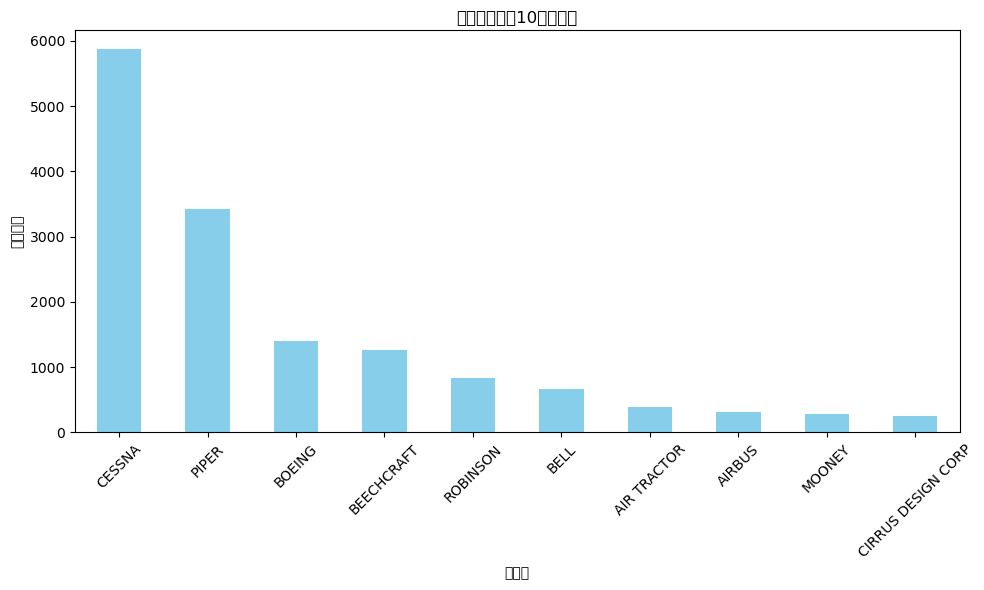

In [121]:
import matplotlib.pyplot as plt
top_10_makes = df['Make'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_makes.plot(kind='bar', color='skyblue')

plt.title('事故最多的前10家制造商')
plt.xlabel('制造商')
plt.ylabel('事故次数')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [125]:
import pandas as pd
boeing = pd.read_csv(
    'C:\\Users\\17376\\Desktop\\CYX\\study\\5291_capstone\\project\\data_new\\boeing_stock_2010_2025.csv',
    skiprows=2,
    names=['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
)
boeing = boeing.drop(index=0).reset_index(drop=True)
print(boeing.head())

         Date      Close       High        Low       Open      Volume
0  2010-01-04  43.777546  43.941185  42.702198  43.419098   6186700.0
1  2010-01-05  45.211349  45.413950  43.637290  43.832099   8867800.0
2  2010-01-06  46.582802  46.746444  45.102253  45.374985   8836500.0
3  2010-01-07  48.468555  48.554272  45.990581  46.372405  14379100.0
4  2010-01-08  48.001015  48.141278  47.424381  47.954262   7146600.0


In [127]:
df['HighestInjuryLevel'] = df['HighestInjuryLevel'].fillna('NONE')
print(df['HighestInjuryLevel'].value_counts())

HighestInjuryLevel
NONE       13852
Fatal       5204
Minor       3325
Serious     2744
Name: count, dtype: int64


In [129]:
df_both = df[df['Make'].isin(['BOEING', 'AIRBUS'])]
severity_counts = df_both.groupby(['Make', 'HighestInjuryLevel']).size().reset_index(name='Count')
print(severity_counts)

     Make HighestInjuryLevel  Count
0  AIRBUS              Fatal     13
1  AIRBUS              Minor     17
2  AIRBUS               NONE    231
3  AIRBUS            Serious     50
4  BOEING              Fatal     38
5  BOEING              Minor     54
6  BOEING               NONE   1098
7  BOEING            Serious    211


In [131]:
severity_pivot = df_both.pivot_table(
    index='Make',
    columns='HighestInjuryLevel',
    values='EventType',  
    aggfunc='count',
    fill_value=0
)
print(severity_pivot)

HighestInjuryLevel  Fatal  Minor  NONE  Serious
Make                                           
AIRBUS                 13     17   231       50
BOEING                 38     54  1098      211


In [133]:
df['SeverityScore'] = df['FatalInjuryCount'] * 3 + df['SeriousInjuryCount'] * 2 + df['MinorInjuryCount'] * 1
print(df.head(30)['SeverityScore'])

0      0
1      0
2      0
3      0
4      0
5     12
6      0
7      0
8      0
9      0
10     0
11     4
12     2
13     1
14     0
15     0
16     4
17     0
18    18
19     2
20     2
21     3
22     3
23     9
24     9
25     0
26     2
27    18
28     0
29     5
Name: SeverityScore, dtype: int64


In [135]:
df['EventDate'] = pd.to_datetime(df['EventDate']).dt.date
daily_severity = df.groupby('EventDate')['SeverityScore'].sum().reset_index()
boeing['Date'] = pd.to_datetime(boeing['Date']).dt.date
full_dates = pd.DataFrame({'Date': boeing['Date'].unique()})
daily_severity_full = full_dates.merge(daily_severity, how='left', left_on='Date', right_on='EventDate')
daily_severity_full['SeverityScore'] = daily_severity_full['SeverityScore'].fillna(0)
print(daily_severity_full.head(10))


         Date   EventDate  SeverityScore
0  2010-01-04  2010-01-04            8.0
1  2010-01-05  2010-01-05           20.0
2  2010-01-06  2010-01-06            3.0
3  2010-01-07  2010-01-07            1.0
4  2010-01-08  2010-01-08           12.0
5  2010-01-11  2010-01-11            0.0
6  2010-01-12  2010-01-12            0.0
7  2010-01-13  2010-01-13            3.0
8  2010-01-14  2010-01-14            4.0
9  2010-01-15  2010-01-15           12.0


In [137]:
daily_severity_full = daily_severity_full.dropna(subset=daily_severity_full.columns.tolist()).reset_index(drop=True)
print(daily_severity_full.head())

         Date   EventDate  SeverityScore
0  2010-01-04  2010-01-04            8.0
1  2010-01-05  2010-01-05           20.0
2  2010-01-06  2010-01-06            3.0
3  2010-01-07  2010-01-07            1.0
4  2010-01-08  2010-01-08           12.0


In [139]:
daily_severity_full['Date'] = pd.to_datetime(daily_severity_full['Date'])
boeing['Date'] = pd.to_datetime(boeing['Date'])
common_dates = pd.Series(list(set(daily_severity_full['Date']) & set(boeing['Date'])))
daily_severity_full_aligned = daily_severity_full[daily_severity_full['Date'].isin(common_dates)].reset_index(drop=True)
boeing_aligned = boeing[boeing['Date'].isin(common_dates)].reset_index(drop=True)
print("对齐后的数据：")
print(daily_severity_full_aligned.head())
print(boeing_aligned.head())

对齐后的数据：
        Date   EventDate  SeverityScore
0 2010-01-04  2010-01-04            8.0
1 2010-01-05  2010-01-05           20.0
2 2010-01-06  2010-01-06            3.0
3 2010-01-07  2010-01-07            1.0
4 2010-01-08  2010-01-08           12.0
        Date      Close       High        Low       Open      Volume
0 2010-01-04  43.777546  43.941185  42.702198  43.419098   6186700.0
1 2010-01-05  45.211349  45.413950  43.637290  43.832099   8867800.0
2 2010-01-06  46.582802  46.746444  45.102253  45.374985   8836500.0
3 2010-01-07  48.468555  48.554272  45.990581  46.372405  14379100.0
4 2010-01-08  48.001015  48.141278  47.424381  47.954262   7146600.0


In [141]:
daily_severity_full['Date'] = pd.to_datetime(daily_severity_full['Date'])
boeing['Date'] = pd.to_datetime(boeing['Date'])
merged_data = pd.merge(daily_severity_full, boeing, on='Date', how='inner')
print("合并后的数据：")
print(merged_data.head())


合并后的数据：
        Date   EventDate  SeverityScore      Close       High        Low  \
0 2010-01-04  2010-01-04            8.0  43.777546  43.941185  42.702198   
1 2010-01-05  2010-01-05           20.0  45.211349  45.413950  43.637290   
2 2010-01-06  2010-01-06            3.0  46.582802  46.746444  45.102253   
3 2010-01-07  2010-01-07            1.0  48.468555  48.554272  45.990581   
4 2010-01-08  2010-01-08           12.0  48.001015  48.141278  47.424381   

        Open      Volume  
0  43.419098   6186700.0  
1  43.832099   8867800.0  
2  45.374985   8836500.0  
3  46.372405  14379100.0  
4  47.954262   7146600.0  


In [143]:
import numpy as np
merged_data['Return'] = np.log(merged_data['Close']).diff()
merged_data = merged_data.dropna().reset_index(drop=True)
print(merged_data.head())

        Date   EventDate  SeverityScore      Close       High        Low  \
0 2010-01-05  2010-01-05           20.0  45.211349  45.413950  43.637290   
1 2010-01-06  2010-01-06            3.0  46.582802  46.746444  45.102253   
2 2010-01-07  2010-01-07            1.0  48.468555  48.554272  45.990581   
3 2010-01-08  2010-01-08           12.0  48.001015  48.141278  47.424381   
4 2010-01-11  2010-01-11            0.0  47.432175  48.382845  47.151649   

        Open      Volume    Return  
0  43.832099   8867800.0  0.032227  
1  45.374985   8836500.0  0.029883  
2  46.372405  14379100.0  0.039684  
3  47.954262   7146600.0 -0.009693  
4  48.273752   5624900.0 -0.011921  


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
merged_data['SeverityScore_scaled'] = scaler.fit_transform(merged_data[['SeverityScore']])
print(merged_data.head())